# <font color = 'green'> Phase 1. Data Preprocessing for PGA Tour Exploratory Data Analysis</font>

**Author: Stefan Jenss**

## <font color = green><u>Step 1. Read in the dataset and all necessary libraries into the environment</u></font>

In [2]:
"""Import necessary libraries and set up the environment"""

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [3]:
"""Import the PGA Tour data"""

pga_tour_data = pd.read_csv('Data_Files/PGA_Tour_Raw_Data.csv')

'Import the PGA Tour data'

----

<font color = green><h2><u>
Step 2. Describe the population and key features of the dataset
</u></h2></font>

* Use `.shape` to determine the size of the dataset (# of rows and columns)
* Use `.head()`, and `tail()` to view a preview of the dataset
* Use `.info()` to evaluate the variable type of the different variable and to identify varibales with potential `Null` values.
* Use `.describe()` to get summary data from the quantitative variables.
* Use `.unique()` to evaluate the number of unique players, tournaments, and courses included in this dataset.

In [4]:
# Check the shape of the data to see how many rows and columns there are
pga_tour_data.shape

# Use the .head() and .tail() methods to see the first and last 5 rows of the data
pga_tour_data.head()
pga_tour_data.tail()

# Use the .info() method to see the data types of each column
pga_tour_data.info()

# Use the .describe method to see the summary statistics for each column
pga_tour_data.describe()

# Use the .unique() method to identify the number of unique players, tournaments, and courses included in the data
print('Number of unique players: ', pga_tour_data['player'].nunique())
print('Number of unique tournaments: ', pga_tour_data['tournament id'].nunique())
print('Number of unique courses: ', pga_tour_data['course'].nunique())


(36864, 37)

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
36859,V. Singh,2271,392,144,146,33.0,26.4,26,0,0.6,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36860,W. Kim,2271,7082,144,150,18.5,12.9,21,0,0.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36861,W. McGirt,2271,3532,216,215,44.5,40.6,45,0,6.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36862,Z. Blair,2271,9040,288,278,73.0,70.8,74,3,23.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36863,Z. Sucher,2271,4708,144,147,22.5,18.9,28,0,0.0,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


Number of unique players:  499
Number of unique tournaments:  333
Number of unique courses:  92


<u><b>Observations:</b></u>
- The raw dataset has 36,864 rows/entries, meaning that there are records on 36,864 player appearance in PGA tour events between the 2015-2022 season.
- From the `.head()` and `.tail()` method of previewing the data, we already observe that there are null values. Specifically, it appears that there is no `pos` and strokes-gained data for older tournaments.
- There are numerous different data types that appear in this dataset, some of the variables will need to be modified to different variable types based on how we anticipate needing to use them in our analysis of the data.
- For the `pos` variables, we can already see that there are some unusual values that will need to be address in the data cleaning process.
- The oldest tournament included in the dataset is The Frys.com Open that occured on October 12th, 2014, that was part of the 2015 season, and the most recent tournament included in the data is The Memorial Tournament presented by Nationwide that occured on June 5th, 2022, that was part of the 2022 season.
- The dataset includes data about **499 players** that completed on the PGA Tour during the 2015-2022 seasons.
- There are **333 unique tournaments** including in the dataset thta occurred during the 2015-2022 seasons.
- During the 2015-2022 seasons, there were **92 unique coursees** played between the different tournaments.

----

## <font color = 'green'><u>Step 3: Inspection and Removal of Questionable Variables</u><font>

### 3.1 Inspection of Questionable Variabels
Based on the results of performing the `.info()` function, we identified the following variables as questionable either because of there number of null-values, or because of their unclear meaning.
- finish_DKP           36864 non-null  int64  
- finish_FDP           36864 non-null  int64  
- finish_SDP           36864 non-null  int64  
- total_DKP            36864 non-null  float64
- total_FDP            36864 non-null  float64
- total_SDP            36864 non-null  int64  
- Unnamed: 2           0 non-null      float64
- Unnamed: 3           0 non-null      float64
- Unnamed: 4           0 non-null      float64

In [5]:
# Inspect the three 'Unnamed' columns to confirm that they do not contain any valuable information
pga_tour_data[['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']]
pga_tour_data['Unnamed: 2'].value_counts()
pga_tour_data['Unnamed: 3'].value_counts()
pga_tour_data['Unnamed: 4'].value_counts()

,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
36859,NaN,NaN,NaN
36860,NaN,NaN,NaN
36861,NaN,NaN,NaN
36862,NaN,NaN,NaN


Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

In [6]:
# Inspect the "DKP", "FKP", and "SDP" variables to try and gain an understanding of what they represent
pga_tour_data[['Player_initial_last',
               'hole_DKP','hole_FDP','hole_SDP',
               'streak_DKP','streak_FDP','streak_SDP',
               'finish_DKP','finish_FDP','finish_SDP',
               'total_DKP','total_FDP','total_SDP']]

,Player_initial_last,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,finish_DKP,finish_FDP,finish_SDP,total_DKP,total_FDP,total_SDP
0,A. Ancer,60.0,51.1,56,3,7.6,3,2,1,0,65.0,59.7,59
1,A. Hadwin,72.5,61.5,61,8,13.0,3,5,4,2,85.5,78.5,66
2,A. Lahiri,21.5,17.4,27,0,0.0,0,0,0,0,21.5,17.4,27
3,A. Long,20.5,13.6,17,0,0.4,0,0,0,0,20.5,14.0,17
4,A. Noren,23.5,18.1,23,0,1.2,0,0,0,0,23.5,19.3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,V. Singh,33.0,26.4,26,0,0.6,0,0,0,0,33.0,27.0,26
36860,W. Kim,18.5,12.9,21,0,0.2,0,0,0,0,18.5,13.1,21
36861,W. McGirt,44.5,40.6,45,0,6.2,0,0,0,0,44.5,46.8,45
36862,Z. Blair,73.0,70.8,74,3,23.2,4,6,5,3,82.0,99.0,81


<u>**Key takeaways from inspection of questionable variables**</u>
- The 'unnamed' variable have no valuable information, so these three variables can be dropped.
- While we cannot determine exactly what the "DKP", "FKP", and "SDP" variables represent because the [AdvancedSportsAnalaytics.com](http://advancedsportsanalaytics.com/) website is no longer up, my assumption is that these values represent fantasy points for each player in different fantasy league platforms. If this assumption is correct, they are still not important for the exploratory data analysis, so they can also be dropped from the dataset.


### 3.2 Dropping Questionable Variables

- Drop the three 'Unnamed' variables that don't contain any data.
- Drop the "DKP", "FKP", and "SDP" variables that have no clear meaning and that will not be used for the exploratory data analysis.

In [7]:
# Drop the three 'Unnamed' columns from the data
pga_tour_data.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

# Confirm that the variables were dropped using true false logic.
if 'Unnamed: 2' and 'Unnamed: 3' and 'Unnamed: 4' in pga_tour_data.columns:
    print('Variables not dropped')
else:
    print('Unnamed variables successfully dropped')

Unnamed variables successfully dropped


In [8]:
# Drop the "DKP", "FKP", and "SDP" variables.
pga_tour_data.drop(columns = 
                   ['hole_DKP','hole_FDP','hole_SDP',
                    'streak_DKP','streak_FDP','streak_SDP',
                    'finish_DKP','finish_FDP','finish_SDP',
                    'total_DKP','total_FDP','total_SDP'],
                  inplace = True)

# Confirm that the variables were dropped using true false logic.
if 'hole_DKP' and 'hole_FDP' and 'hole_SDP' and 'streak_DKP' and 'streak_FDP' and 'streak_SDP' and 'finish_DKP' and 'finish_FDP' and 'finish_SDP' and 'total_DKP' and 'total_FDP' and 'total_SDP' in pga_tour_data.columns:
    print('Variables not dropped')
else:
    print('"DKP", "FKP", and "SDP" variables successfully dropped')

"DKP", "FKP", and "SDP" variables successfully dropped


----

## <font color = 'green'><u>Step 4. Evaluating and Changing Variable Data Types</u></font>

### 4.1 Changing All Identifying Variables to Objects

<u>**The Player and Tournament Identifier Variables:**</u>
1. 'Player_initial_last'
2. 'tournament id'
3. 'player id'
4. 'player'
5. 'tournament name'
6. 'course'
7. 'season'

For good measure, we will change of all these variables to string objects.

In [9]:
"""
Change all identifying variables to string data types and confirm the change was successfully made.
"""

# Define all the identifying variables
identifying_variables = ['Player_initial_last', 'tournament id', 'player id', 'player', 'tournament name', 'course', 'season']

# Define all the identifying variables that are not already strings and change them to strings
for variables in identifying_variables:
    if pga_tour_data[variables].dtype != 'object':
        pga_tour_data[variables] = pga_tour_data[variables].astype('object')
        
# Confirm that the variables were changed to strings using .info()
pga_tour_data[identifying_variables].info()

'\nChange all identifying variables to string data types and confirm the change was successfully made.\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Player_initial_last  36864 non-null  object
 1   tournament id        36864 non-null  object
 2   player id            36864 non-null  object
 3   player               36864 non-null  object
 4   tournament name      36864 non-null  object
 5   course               36864 non-null  object
 6   season               36864 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


### 4.2 Changing the `date` variable to a datetime value type

In [10]:
"""
In order to be able to perform time series analysis, I will change the `date` variable to a datetime data type.
"""

# Change the `date` variable to a datetime dat type
pga_tour_data['date'] = pd.to_datetime(pga_tour_data['date'])

# Confirm that the variable was changed to a datetime data type using .info()
pga_tour_data['date'].info()

'\nIn order to be able to perform time series analysis, I will change the `date` variable to a datetime data type.\n'

<class 'pandas.core.series.Series'>
RangeIndex: 36864 entries, 0 to 36863
Series name: date
Non-Null Count  Dtype         
--------------  -----         
36864 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 288.1 KB


In [11]:
pga_tour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  36864 non-null  object        
 1   tournament id        36864 non-null  object        
 2   player id            36864 non-null  object        
 3   hole_par             36864 non-null  int64         
 4   strokes              36864 non-null  int64         
 5   n_rounds             36864 non-null  int64         
 6   made_cut             36864 non-null  int64         
 7   pos                  21317 non-null  float64       
 8   player               36864 non-null  object        
 9   tournament name      36864 non-null  object        
 10  course               36864 non-null  object        
 11  date                 36864 non-null  datetime64[ns]
 12  purse                36864 non-null  float64       
 13  season               36864 non-

----

## <font color = 'green'><u>Step 5. Address Missing Values is the  `pos` and `Finish` variables of the dataset</u></font>

Based on the `.info()` results, we observed that the `pos` variable has 15,547 Null values (36,864 - 21,317), and the `Finish` variable has 7,683 Null values (36,864 - 29,181). Therefore, we want to explore why there are missing values and see if we can decide on an appropriate strategy to address them.

In [12]:
# Explore the `Finish` and `pos` variables to see if they are the same
pga_tour_data[['player', 'tournament name', 'season','Finish','pos']].head()
pga_tour_data[['player', 'tournament name', 'season','Finish','pos']].tail()
# pd.set_option('display.max_rows', None)
pga_tour_data['Finish'].value_counts()
pga_tour_data['pos'].value_counts()

,player,tournament name,season,Finish,pos
0,Abraham Ancer,The Memorial Tournament pres. by Nationwide,2022,T32,32.0
1,Adam Hadwin,The Memorial Tournament pres. by Nationwide,2022,T18,18.0
2,Anirban Lahiri,The Memorial Tournament pres. by Nationwide,2022,CUT,NaN
3,Adam Long,The Memorial Tournament pres. by Nationwide,2022,CUT,NaN
4,Alexander Noren,The Memorial Tournament pres. by Nationwide,2022,CUT,NaN


,player,tournament name,season,Finish,pos
36859,Vijay Singh,Frys.com Open,2015,NaN,NaN
36860,Whee Kim,Frys.com Open,2015,NaN,NaN
36861,William McGirt,Frys.com Open,2015,NaN,999.0
36862,Zac Blair,Frys.com Open,2015,NaN,12.0
36863,Zack Sucher,Frys.com Open,2015,NaN,NaN


Finish
CUT    12146
T17      327
T18      324
T13      296
T26      280
       ...  
49         1
39         1
38         1
46         1
91         1
Name: count, Length: 175, dtype: int64

pos
2.0      479
17.0     430
18.0     401
3.0      391
10.0     391
        ... 
999.0      7
83.0       6
86.0       4
87.0       2
91.0       1
Name: count, Length: 89, dtype: int64

**<u>Initial observations comparing the `pos` and `Finish` variables:</u>**
- The most recent tournament has `Finsih` data, while the oldest tournament does not. Moreover, all of the tournament have `pos` values. A `pos` value of 'NaN' corresponds to the player not making the cut.
- Additionally, my references the final leaderboard of The Frys.com Open from 2014 (2015 season), I was able to identify that a `pos` value of '999' corresponds to a player withdrawl from the even (WD).
- Within the `Finish` variable, I was able to identify four unique non-numerical finish positions:
    - W/D      145 (Withdrew)
    - WD       143 (Withdrew)
    - MDF      117 (Make Cut, Didn't Finish)
    - DQ        24 (Disqualified)
- Since 'W/D' and 'WD' both mean that the patient withdrew from the tournament, we will change all occurrances of 'W/D' to 'WD' for consistency.
    - For playering missing `Finish` data, we can also determine whether the player should be labeled as 'WD' based on if their `n_round` value is equal to 1.
- For MDF, there is no numerical representation for this that I was able to identify in the 'pos' variable; however, we can use the `n_rounds` and `cut_made` variables to determine whether a player should be labeled as 'MDF'.
    - If the player has a `made_cut` value of '1', but an `n_rounds` value of less than 4, this player can be considered 'MDF'
- For DQ, there does not appear to be a corresponding numerical `pos` value for this label, so we will not be able to address this for tournaments missing `Finish` values.

**<u> Plan for Addressing Missing Values in the `pos` and `Finish` variables:</u>**
1. Assign a `Finish` value of 'WD' to all players that have a corresponding `pos` value of '999'.
2. After we've used the '999' values to assign a proper `Finish` value, we will replace all '999.0' values with a '0', since the player did not achieve a calid finishing position and we want to account for this in our analysis.
3. For the `Finish` variable, change all occurrances of 'W/D' to to 'WD'
4. Assign a `Finish` value of 'WD' to all players that have an `n_rounds` value of '1'.
5. Assign a `Finsih` value of 'MDF' to all players that have a `made_cut` value of '1' and `n_rounds` value of less than 4.
6. Replace all the remaining 'NaN' values in the `pos` column with a '0' to indicate that they did not finish the tournament with a valid finishing position.
7. Replace all of the remaining 'NaN' `Finish` values with their corresponding `pos` value
    - *To note: the shortcoming of this approach is that the `Finish` variable is a string data type, and includes a 'T' in front of the player's finishing position to indicate that they tied with another player.*
8. Reassign all of the new '0' `Finish` value to 'CUT'.
9. Confirm that the changes have been properly made.

 

In [13]:
# 0. Copy the original pga_tour_data dataframe to a new dataframe called pga_cleaning so that we can always go back to the original dataset if needed
pga_cleaning = pga_tour_data.copy()

# 1. Assign a `Finish` valuee of 'WD" to all players that have a corresponding 'pos' value of '999.0'
pga_cleaning.loc[pga_cleaning['pos'] == 999.0, 'Finish'] = 'WD'

# 2. Replace all `pos` values of '999.0' with a '0' to indicate that the player did not achieve a valid finishing position
pga_cleaning['pos'].replace(999.0, 0, inplace = True)

# 3. Replace all `Finish` values of 'W/D' to 'WD' to make the values consistent
pga_cleaning['Finish'].replace('W/D', 'WD', inplace = True)

# 4. Assign a `Finish` value of 'WD' to all players that have an `n_rounds` value of 1.
# This is because if a player only played one round, they most likely withdrew from the tournament
pga_cleaning.loc[pga_cleaning['n_rounds'] == 1, 'Finish'] = 'WD'

# 5. Assign a `Finish` value of 'MDF' to all players that have a `made_cut` value of 1 and an `n_rounds` value of less than 4
pga_cleaning.loc[(pga_cleaning['made_cut'] == 1) & (pga_cleaning['n_rounds'] < 4), 'Finish'] = 'MDF'

# 6. Replace all the remaining 'NaN' values in the `pos` column with a '0' to indicate that the player did not achieve a valid finishing position
pga_cleaning['pos'].fillna(0, inplace = True)

# 7. Replace all the remaining 'NaN' `Finish` values with their corresponding `pos` values
pga_cleaning['Finish'].fillna(pga_cleaning['pos'], inplace = True)

# 8. Replace all the new '0' `Finish` values with 'CUT' to indicate that the player did not make the cut
pga_cleaning['Finish'].replace(0, 'CUT', inplace = True)

# 9. Confirm the changes were made successfully
pga_cleaning[['player', 'tournament name', 'season','Finish','pos']].head()
pga_cleaning[['player', 'tournament name', 'season','Finish','pos']].tail()
pga_cleaning['Finish'].value_counts()
pga_cleaning['pos'].value_counts()

,player,tournament name,season,Finish,pos
0,Abraham Ancer,The Memorial Tournament pres. by Nationwide,2022,T32,32.0
1,Adam Hadwin,The Memorial Tournament pres. by Nationwide,2022,T18,18.0
2,Anirban Lahiri,The Memorial Tournament pres. by Nationwide,2022,CUT,0.0
3,Adam Long,The Memorial Tournament pres. by Nationwide,2022,CUT,0.0
4,Alexander Noren,The Memorial Tournament pres. by Nationwide,2022,CUT,0.0


,player,tournament name,season,Finish,pos
36859,Vijay Singh,Frys.com Open,2015,CUT,0.0
36860,Whee Kim,Frys.com Open,2015,CUT,0.0
36861,William McGirt,Frys.com Open,2015,MDF,0.0
36862,Zac Blair,Frys.com Open,2015,12.0,12.0
36863,Zack Sucher,Frys.com Open,2015,CUT,0.0


Finish
CUT    13858
MDF     1147
WD       335
T17      327
T18      324
       ...  
87         1
42         1
91         1
38         1
47         1
Name: count, Length: 258, dtype: int64

pos
0.0     15554
2.0       479
17.0      430
18.0      401
10.0      391
        ...  
84.0        7
83.0        6
86.0        4
87.0        2
91.0        1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='pos', ylabel='Count'>

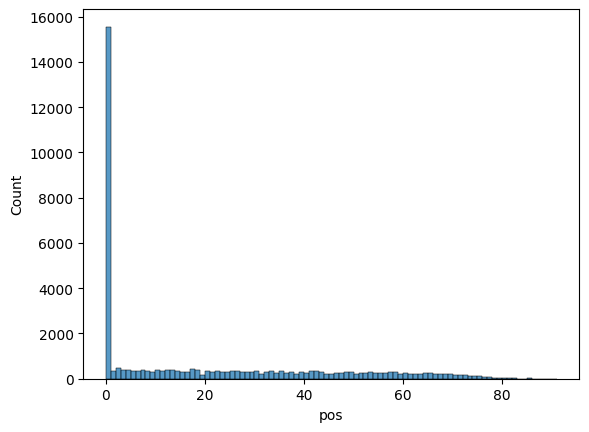

In [14]:
# Create a histogram of the 'pos' variable to confirm that the Null values were replaced with 0 and to observe any other discrepensies in the `pos` data.
sns.histplot(data = pga_cleaning, x = 'pos', bins = 91)


<u>**Evaluating the proportion of players that make the cut:**</u>

In [15]:
"""
Sum the count of all the 0 values in the `pos` variable and the count of all the non-zero values in the `pos` variable to see how they compare.
"""
zero_values = pga_cleaning['pos'].value_counts()[0]
non_zero_values = pga_cleaning['pos'].value_counts()[1:].sum()

# Display the results
print(f"Number of 0 values in the 'pos' variable: {zero_values}") # 15,554 0 values
print(f"Number of non-zero values in the 'pos' variable: {non_zero_values}") # 13,865 non-zero values

'\nSum the count of all the 0 values in the `pos` variable and the count of all the non-zero values in the `pos` variable to see how they compare.\n'

Number of 0 values in the 'pos' variable: 15554
Number of non-zero values in the 'pos' variable: 13865


/var/folders/t2/xw_g33n96rxfmq14n3dnpb6h0000gn/T/ipykernel_56971/3288825574.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  non_zero_values = pga_cleaning['pos'].value_counts()[1:].sum()


When comparing the number of zero-position values to non-zero-position values from our, we find that ~47.13% of players make the cut and have a valid finishing position. 

This makes sense when we consider the structure of the "cut" on the PGA Tour. Tournament on the PGA Tour are structured in a way that ~150 players start the tournament and only the top 70, including ties, make the cut. Based on these number, ~46.67% of players make the cut, which is very similar to the proportion that we see here.

## <font color = "green"><u>Step 6. Creation of "Course Experience" Variable and DataFrame </u></font>

In the analysis phase of the EDA, I want to analyze whether a player's previous course experience has an impact on their performance at a given course.
To do this, I will create a new variable called `course_experience` that calculates the number of rounds the player has previously played at that course
prior to the current tournament.

Method for creating the `course_experience` variable:
1. Sort the dataset by player, course, and season in ascending order.
2. Group the dataset by player and course, and calculate the cumulative sum of n_rounds.
3. Subtract the current n_rounds from the cumulative sum to get the number of rounds the player has previously played at that course.
4. Reset the course_experience to 0 for the first season of each player and course combination.

In [16]:
# Sort the dataset by player, course, and season in ascending order
pga_cleaning.sort_values(['player', 'course', 'season'], inplace=True)

# Group the dataset by player and course, and calculate the cumulative sum of n_rounds
pga_cleaning['course_experience'] = pga_cleaning.groupby(['player', 'course'])['n_rounds'].cumsum()

# Subtract the current n_rounds from the cumulative sum to get the number of rounds the player has previously played at that course
pga_cleaning['course_experience'] -= pga_cleaning['n_rounds']

# Reset the course_experience to 0 for the first season of each player and course combination
pga_cleaning.loc[pga_cleaning.groupby(['player', 'course'])['season'].idxmin(), 'course_experience'] = 0

# Display the updated dataset
pga_cleaning[['Player_initial_last', 'n_rounds', 'course', 'tournament name', 'season', 'course_experience']].head(15)
pga_cleaning[['Player_initial_last', 'n_rounds', 'course', 'tournament name', 'season', 'course_experience']].tail(15)


,Player_initial_last,n_rounds,course,tournament name,season,course_experience
29111,A. Baddeley,4,"Baltusrol - Springfield, NJ",PGA Championship,2016,0
26443,A. Baddeley,4,"Bay Hill - Orlando, FL",Arnold Palmer Invitational Pres. by Mastercard,2017,0
16605,A. Baddeley,4,"Bay Hill - Orlando, FL",Arnold Palmer Invitational Pres. by Mastercard,2019,4
28626,A. Baddeley,2,"Bethpage - Farmingdale, NY",The Barclays,2016,0
30962,A. Baddeley,4,"Coco Beach - Rio Grande, Puerto Rico",Puerto Rico Open,2016,0
17017,A. Baddeley,4,"Coco Beach - Rio Grande, Puerto Rico",Puerto Rico Open,2019,4
34265,A. Baddeley,2,"Colonial - Ft. Worth, TX",Crowne Plaza Invitation,2015,0
30032,A. Baddeley,4,"Colonial - Ft. Worth, TX",Dean & Deluca Invitational,2016,2
25458,A. Baddeley,2,"Colonial - Ft. Worth, TX",Dean & Deluca Invitational,2017,6
20669,A. Baddeley,2,"Colonial - Ft. Worth, TX",Fort Worth Invitational,2018,8


,Player_initial_last,n_rounds,course,tournament name,season,course_experience
32505,Z. Dou,4,"Sheshan International GC - Shanghai, China",World Golf Championships-HSBC Champions,2016,4
28242,Z. Dou,4,"Sheshan International GC - Shanghai, China",World Golf Championships-HSBC Champions,2017,8
23517,Z. Dou,4,"Sheshan International GC - Shanghai, China",World Golf Championships-HSBC Champions,2018,12
12786,Z. Dou,4,"Sheshan International GC - Shanghai, China",WGC-HSBC Champions,2020,16
23778,Z. Dou,2,"Silverado Resort - Napa, CA",Safeway Open,2018,0
20046,Z. Dou,2,"TPC Deere Run - Silvis, IL",John Deere Classic,2018,0
20306,Z. Dou,2,"TPC River Highlands - Cromwell, CT",Travelers Championship,2018,0
21347,Z. Dou,4,"TPC San Antonio - San Antonio, TX",Valero Texas Open,2018,0
20553,Z. Dou,4,"TPC Southwind - Memphis, TN",FedEx St. Jude Classic,2018,0
23355,Z. Dou,2,"TPC Summerlin - Las Vegas, NV",Shriners Hospital for Children Open,2018,0


## <font color = 'green'><u>Step 7. Addressing 'NaN' Strokes-Gained Data and Creating New Strokes Gained Dataset</u></font>

### 7.1 Addressing 'NaN' strokes-gained values

Now, to make sure that the nulls are addressed within the strokes gained statistics, all of the missing data values will be changed to 0 so that the players’ participation in this tournament can still be used for analysis not involving strokes-gained data.

In [17]:
pga_tour_data[['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']]
pga_tour_data[['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']].describe()

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,0.20,-0.13,-0.08,0.86,0.65,0.85
1,0.36,0.75,0.31,0.18,1.24,1.60
2,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,0.53,-0.36,-1.39,0.19,-1.56,-1.04
...,...,...,...,...,...,...
36859,NaN,NaN,NaN,NaN,NaN,NaN
36860,NaN,NaN,NaN,NaN,NaN,NaN
36861,NaN,NaN,NaN,NaN,NaN,NaN
36862,NaN,NaN,NaN,NaN,NaN,NaN


,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


In [18]:
# Before addressing the `Null` values in the strokes-gained variable, create a copy of the pga_cleaning data to be used for the creation
# of the strokes-gained dataframe.
pga_cleaning_sg_copy = pga_cleaning.copy()

# Define all of the strokes-gained variables
sg_variables = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

# Address all the Null values in the strokes-gained variables and replace them with 0.
for variables in sg_variables:
    pga_cleaning[variables] = pga_cleaning[variables].fillna(0)
    
# Confirm that the Null values were replaced with 0 using .isnull().sum()
pga_cleaning[sg_variables].isnull().sum()

sg_putt     0
sg_arg      0
sg_app      0
sg_ott      0
sg_t2g      0
sg_total    0
dtype: int64

### 7.2 Creating the Strokes-Gained Dataframe

All of the tournaments in the dataset do not include the strokes gained (SG) statistics. Because these SG statistics are very important to by EDA, I am creating a new DataFrames that only includes tournaments that have SG data available.


1. Identify all the tournaments that have strokes gained data.
    
2. Create a list of all the tournaments that have strokes gained data.
    
3. Remove all the players that are missing strokes gained data from those tournaments.

In [19]:
"""
Create a new `sg_data` dataframe that only includes the data from tournaments that includes strokes-gained data.
"""

# Create a new dataframe that only includes the data from tournaments that includes strokes-gained data.
sg_data_clean = pga_cleaning_sg_copy[pga_cleaning_sg_copy['sg_total'].notnull()]

"""
By looking at the .describe(), it's identified that the `sg_total` variable contains 29181 non-null values, while the other strokes-gained variables only contain 29180 non-null values.
This indicates that there is one row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.
Thus, the next step is to identify this row of data and remove it from the dataframe.
"""

# Identify the row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.
sg_data_clean[sg_data_clean['sg_arg'].isnull()] # Row 2068 - C. Hoffman, 2022 - AT&T Pebble Beach Pro-Am

# Remove this row of data that contains nulls for non-`sg_total` strokes-gained variables.
sg_data_clean = pga_cleaning_sg_copy[pga_cleaning_sg_copy['sg_putt'].notnull()]

# Confirm that the new dataframe only includes the data from tournaments that included strokes gained data.
sg_data_clean.info()

# View the head and tail of the new dataframe to observe the new strokes-gained data.
sg_data_clean.head()
sg_data_clean.tail()


'\nCreate a new `sg_data` dataframe that only includes the data from tournaments that includes strokes-gained data.\n'

"\nBy looking at the .describe(), it's identified that the `sg_total` variable contains 29181 non-null values, while the other strokes-gained variables only contain 29180 non-null values.\nThis indicates that there is one row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.\nThus, the next step is to identify this row of data and remove it from the dataframe.\n"

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,course_experience
2069,C. Hoffman,401353235,205,72,70,1,0,0.0,Charley Hoffman,AT&T Pebble Beach Pro-Am,...,2022,0,WD,NaN,NaN,NaN,NaN,NaN,2.23,14


<class 'pandas.core.frame.DataFrame'>
Index: 29180 entries, 29111 to 18214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Player_initial_last  29180 non-null  object        
 1   tournament id        29180 non-null  object        
 2   player id            29180 non-null  object        
 3   hole_par             29180 non-null  int64         
 4   strokes              29180 non-null  int64         
 5   n_rounds             29180 non-null  int64         
 6   made_cut             29180 non-null  int64         
 7   pos                  29180 non-null  float64       
 8   player               29180 non-null  object        
 9   tournament name      29180 non-null  object        
 10  course               29180 non-null  object        
 11  date                 29180 non-null  datetime64[ns]
 12  purse                29180 non-null  float64       
 13  season               29180 non-n

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,course_experience
29111,A. Baddeley,2507,16,280,279,4,1,49.0,Aaron Baddeley,PGA Championship,...,2016,0,T49,0.12,0.24,0.13,0.16,0.53,0.66,0
26443,A. Baddeley,2697,16,288,289,4,1,41.0,Aaron Baddeley,Arnold Palmer Invitational Pres. by Mastercard,...,2017,0,T41,0.51,1.00,0.12,-1.07,0.05,0.55,0
16605,A. Baddeley,401056521,16,288,283,4,1,17.0,Aaron Baddeley,Arnold Palmer Invitational Pres. by Mastercard,...,2019,0,T17,0.69,2.49,-0.61,-0.99,0.89,1.57,4
15303,A. Baddeley,401056553,16,280,283,4,1,48.0,Aaron Baddeley,Charles Schwab Challenge,...,2019,0,T48,1.38,0.33,-0.31,-1.33,-1.31,0.08,10
5100,A. Baddeley,401317529,16,284,282,4,1,44.0,Aaron Baddeley,Palmetto Championship at Congaree,...,2021,0,T44,1.08,0.75,0.36,-1.36,-0.25,0.83,0


,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,course_experience
20553,Z. Dou,401025254,8889,280,282,4,1,56.0,Zecheng Dou,FedEx St. Jude Classic,...,2018,0,T56,-0.81,-0.08,0.13,0.70,0.75,-0.05,0
23355,Z. Dou,3768,8889,142,147,2,0,0.0,Zecheng Dou,Shriners Hospital for Children Open,...,2018,0,CUT,-0.65,0.33,-1.09,-0.36,-1.12,-1.77,0
22779,Z. Dou,3746,8889,144,155,2,0,0.0,Zecheng Dou,Farmers Insurance Open,...,2018,0,CUT,-1.89,-1.20,-0.90,-1.39,-3.49,-5.38,0
20922,Z. Dou,401025251,8889,142,139,2,0,0.0,Zecheng Dou,AT&T Byron Nelson,...,2018,0,CUT,-0.25,0.79,-0.70,0.03,0.12,-0.12,0
18214,Z. Dou,3747,8889,140,145,2,0,0.0,Zecheng Dou,Sony Open in Hawaii,...,2018,0,CUT,-3.19,0.85,0.14,-1.09,-0.10,-3.28,0


### 7.3 Creating the Strokes-Gained Valid Dataset

As it currently stands in the dataset, finishing position of 1 indicates the best possible result, but a finishing position of 0 indicates that the player did not finishing the tournament and gain a valid finishing position. This will create an issue with determining correlations and identifying relationships between the strokes-gained data and finishing position, because the worst performing players will have a finishing position that is technically "better" than the winners (the lower the finishing position, the better the result, and 0 is lower than 1). Thus, this issue needs to be addressed before we perform any analysis with the strokes gained data.

The approach I have decided to take to address this issue is to drop all of the players who had a finishing position of '0', since these players technically did not achieve a valid finishing position, and for the sake of this analysis, we are only interested in players who produced a full body of work at the tournaments (a.k.a, completed all four rounds of golf).

In [21]:
"""
Create a strokes-gained-valid dataframe that exludes players who have a finishing position (`pos`) of 0--indicating that they did not achieve a valid finishing position.
"""

# Create the strokes-gained-valid dataframe
sg_data_valid = sg_data_clean[sg_data_clean['pos'] != 0]

# Compare the shape of the strokes-gained-valid dataframe to the original strokes-gained dataframe to see how many rows were removed.
sg_data_clean.shape
sg_data_valid.shape
doff = sg_data_clean.shape[0] - sg_data_valid.shape[0]
print(f"Number of rows removed: {doff}")

'\nCreate a strokes-gained-valid dataframe that exludes players who have a finishing position (`pos`) of 0--indicating that they did not achieve a valid finishing position.\n'

(29180, 23)

(16287, 23)

Number of rows removed: 12893


#### <u> 7.3.1 Creating the Full PGA Data Valid Dataset </u> 

For good measure, I am also going to create a "valid" dataset for the full PGA tour cleaned data.

In [22]:
"""
Create a pga_cleaning dataframe that excludes players who have a finishing position (`pos`) of 0--indicating that they did not achieve a valid finishing position.
"""

# Create the `pga_clean_valid` dataframe
pga_clean_valid = pga_cleaning[pga_cleaning['pos'] != 0]

# Compare the shape of the `pga_clean_valid` dataframe to the original `pga_cleaning` dataframe to see how many rows were removed.
pga_cleaning.shape
pga_clean_valid.shape
doff = pga_cleaning.shape[0] - pga_clean_valid.shape[0]
print(f"Number of rows removed: {doff}")

'\nCreate a pga_cleaning dataframe that excludes players who have a finishing position (`pos`) of 0--indicating that they did not achieve a valid finishing position.\n'

(36864, 23)

(21310, 23)

Number of rows removed: 15554


## <font color = 'green'><u>Step 8. Export the Cleaned Datasets</u></font>

In [23]:
# Export the full cleaned dataset as a csv file
pga_cleaning.to_csv('pga_clean.csv', header = True, index = False)

# Export the strokes-gained cleaned dataset as a csv file
sg_data_clean.to_csv('sg_data_clean.csv', header = True, index = False)

# Export the strokes-gained-valid and pga_clean_valid datasets as csv files
pga_clean_valid.to_csv('pga_clean_valid.csv', header = True, index = False)
sg_data_valid.to_csv('sg_data_valid.csv', header = True, index = False)